<a href="https://colab.research.google.com/github/aezamsos/data-statistics-analytics-python/blob/main/Week1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# Sample words
words = ["running", "flies", "better", "cats", "studies", "happily"]

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in words]

print("Original Words:", words)
print("Stemmed Words:", stemmed_words)

Original Words: ['running', 'flies', 'better', 'cats', 'studies', 'happily']
Stemmed Words: ['run', 'fli', 'better', 'cat', 'studi', 'happili']


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary datasets
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Sample words
words = ["running", "flies", "better", "cats", "studies"]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print("Original Words:", words)
print("Lemmatized Words:", lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original Words: ['running', 'flies', 'better', 'cats', 'studies']
Lemmatized Words: ['running', 'fly', 'better', 'cat', 'study']


In [ ]:
# Lemmatization with correct POS tags
lemmatized_words = [
    lemmatizer.lemmatize("running", pos="v"),  # Verb form
    lemmatizer.lemmatize("flies", pos="n"),    # Noun form
    lemmatizer.lemmatize("better", pos="a"),   # Adjective form
    lemmatizer.lemmatize("studies", pos="n")   # Noun form
]

print(lemmatized_words)

['run', 'fly', 'good', 'study']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "AI is amazing and AI is the future.",
    "Machine Learning is a part of AI.",
    "Deep Learning and AI are transforming the world."
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert matrix to array
tfidf_array = tfidf_matrix.toarray()

# Print results
import pandas as pd
df = pd.DataFrame(tfidf_array, columns=feature_names)
print(df)

         ai   amazing       and       are  ...     part       the  transforming     world
0  0.450809  0.381643  0.290249  0.000000  ...  0.00000  0.290249      0.000000  0.000000
1  0.278245  0.000000  0.000000  0.000000  ...  0.47111  0.000000      0.000000  0.000000
2  0.239447  0.000000  0.308332  0.405419  ...  0.00000  0.308332      0.405419  0.405419

[3 rows x 14 columns]


<ipython-input-22-4ea0db9cb8fa>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')


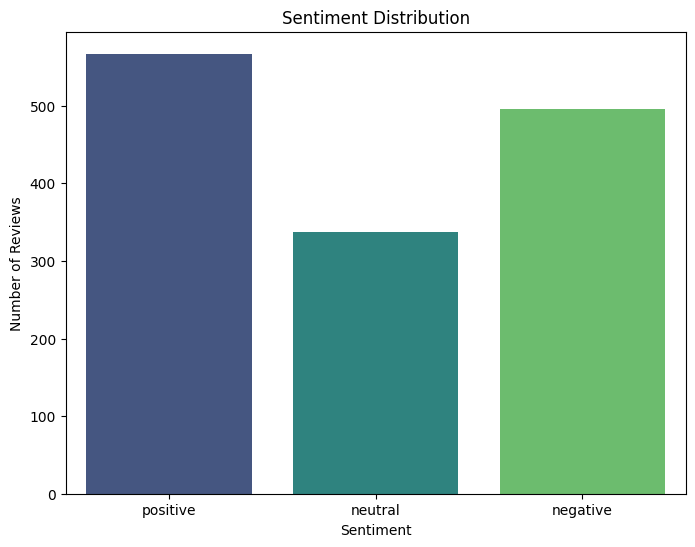

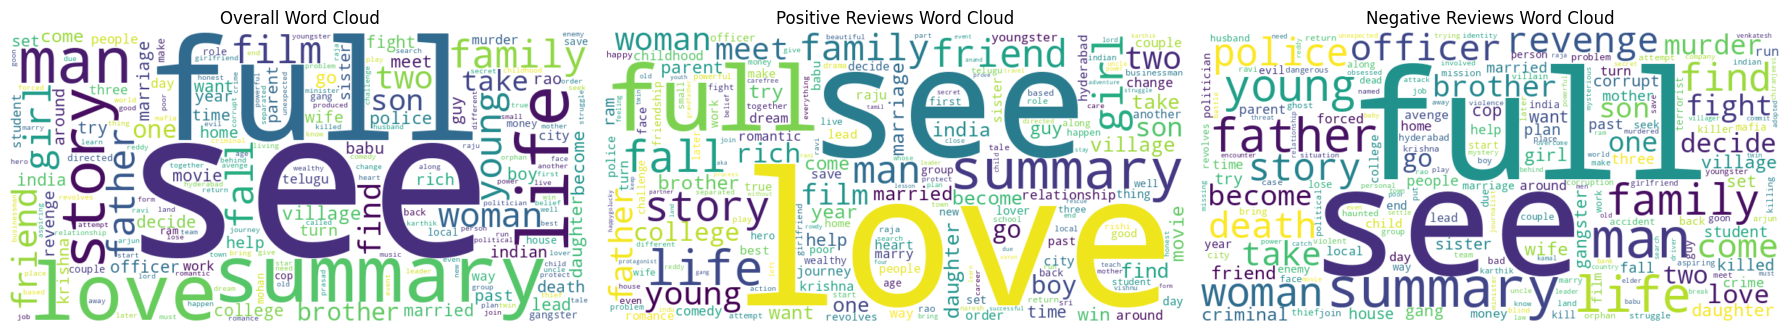

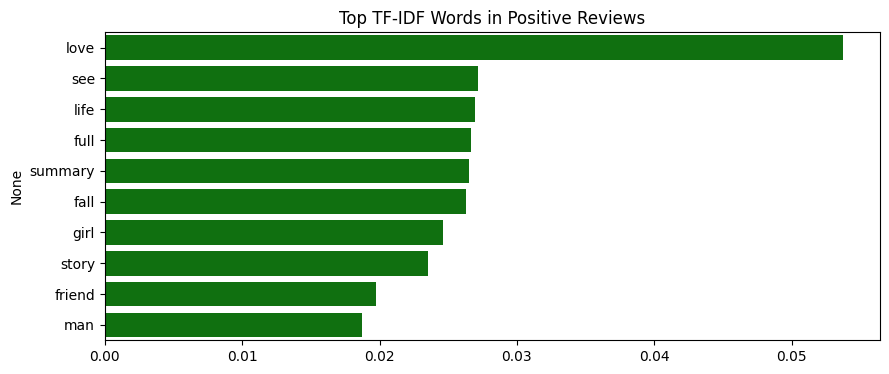

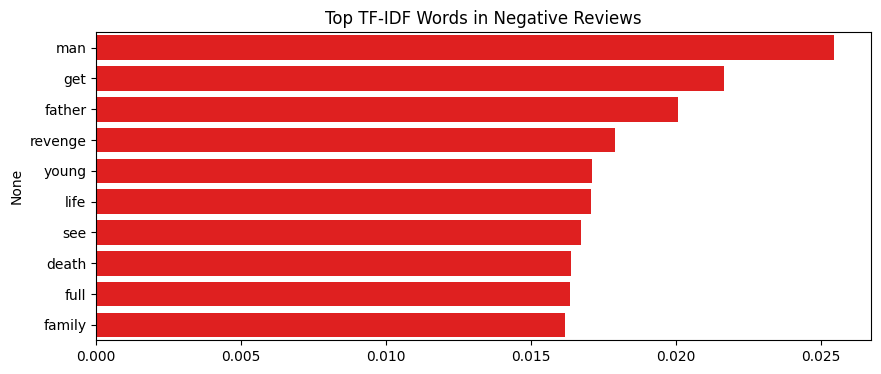

Preprocessing, sentiment analysis, and visualization completed.
Movie with the most positive reviews: Devadasu (2 positive reviews)
Movie with the most negative reviews: Gang Leader (2 negative reviews)

Top 5 Movies with Most Positive Reviews:
Movie
Vijetha            2
Devadasu           2
Jay Jay            1
Rowdy Inspector    1
Jayam Manadera     1
Name: positive, dtype: int64

Top 5 Movies with Most Negative Reviews:
Movie
Veera          2
Gang Leader    2
Mirchi         1
Mogudu         1
Money          1
Name: negative, dtype: int64


<ipython-input-22-4ea0db9cb8fa>:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_positive['positive'].values, y=top5_positive.index, ax=axes[0], palette='viridis')
<ipython-input-22-4ea0db9cb8fa>:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_negative['negative'].values, y=top5_negative.index, ax=axes[1], palette='magma')


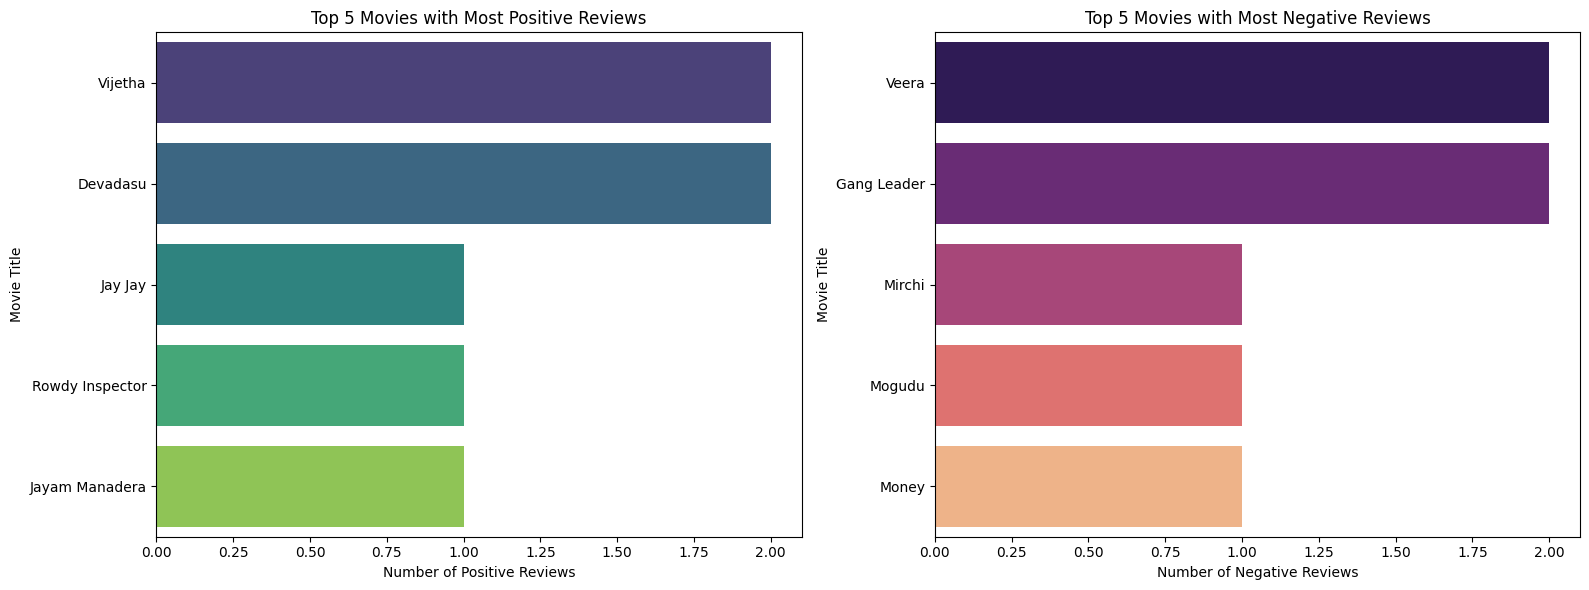

Preprocessing, sentiment analysis, and visualization completed.


In [ ]:
!pip install wordcloud
!pip install vaderSentiment
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download necessary NLTK data (only need to do this once)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download punkt_tab package to resolve the LookupError


# --- Function Definitions ---

def preprocess_text(text):
    """
    Cleans and preprocesses text for analysis.

    Args:
        text (str): The input text.

    Returns:
        str: The cleaned text.
    """
    if not isinstance(text, str):  # Handle non-string input
        return ""
    text = text.lower()
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)  # Remove punctuation (more robust)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # Remove stopwords and non-alphabetic
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Define get_sentiment outside of preprocess_text
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

def plot_wordcloud(text_series, title, ax):
    """
    Generates and displays a word cloud.

    Args:
        text_series (pd.Series): Series of text data.
        title (str): Title of the word cloud.
        ax (matplotlib.axes.Axes): The axes on which to plot.
    """
    text = " ".join(text_series.dropna())  # Drop NaN values before joining
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(title)

# --- Main Script ---

# Load the dataset
try:
    df = pd.read_csv("TeluguMovies_dataset.csv") # Make sure this file exists and is accessible
except FileNotFoundError:
    print("Error: TeluguMovies_dataset.csv not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Data Cleaning and Preprocessing
#df = df.dropna()  # Remove rows with missing values # This line caused the NameError

# Instead of simply dropping rows with any missing values, we can impute the missing values with empty strings:
df['review'] = df['review'].fillna('')
df = df.dropna(subset=['review'])  # Drop if 'review' itself is missing

# Then add a check:
if df.empty:
    print("Error: DataFrame is empty after handling missing values.")
    exit()

if 'review' not in df.columns:
    print("Error: 'review' column not found.")
    exit()

df['cleaned_review'] = df['review'].apply(preprocess_text)

# Sentiment Analysis (on original text)
df['sentiment'] = df['review'].apply(get_sentiment)

# --- Visualization ---

# 1. Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# 2. Word Clouds (using subplots for better layout)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

plot_wordcloud(df['cleaned_review'], "Overall Word Cloud", axes[0])
plot_wordcloud(df[df['sentiment'] == 'positive']['cleaned_review'], "Positive Reviews Word Cloud", axes[1])
plot_wordcloud(df[df['sentiment'] == 'negative']['cleaned_review'], "Negative Reviews Word Cloud", axes[2])
#plot_wordcloud(df[df['sentiment'] == 'neutral']['cleaned_review'], "Neutral Reviews Word Cloud", axes[3]) # Add if you need neutral

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# 3. TF-IDF Analysis and Visualization

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(df['cleaned_review'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate mean TF-IDF scores for positive and negative reviews
positive_tfidf = tfidf_df[df['sentiment'] == 'positive'].mean().sort_values(ascending=False).head(10)
negative_tfidf = tfidf_df[df['sentiment'] == 'negative'].mean().sort_values(ascending=False).head(10)

# Plot TF-IDF scores (handling potential empty Series)
if not positive_tfidf.empty:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=positive_tfidf.values, y=positive_tfidf.index, color="green")
    plt.title("Top TF-IDF Words in Positive Reviews")
    plt.show()
else:
    print("No positive reviews found to calculate TF-IDF.")
if not negative_tfidf.empty:
     plt.figure(figsize=(10, 4))
     sns.barplot(x=negative_tfidf.values, y=negative_tfidf.index, color="red")
     plt.title("Top TF-IDF Words in Negative Reviews")
     plt.show()
else:
    print("No negative reviews found to calculate TF-IDF.")

# --- Save Processed Data ---
df.to_csv("IMDB_Processed.csv", index=False)
print("Preprocessing, sentiment analysis, and visualization completed.")


# --- Movies with Most Positive/Negative Reviews ---
# Group by movie title and count the occurrences of each sentiment
sentiment_by_movie = df.groupby('Movie')['sentiment'].value_counts().unstack(fill_value=0)

# Get the movie with the most positive reviews
most_positive_movie = sentiment_by_movie['positive'].idxmax()
most_positive_count = sentiment_by_movie['positive'].max()

# Get the movie with the most negative reviews
most_negative_movie = sentiment_by_movie['negative'].idxmax()
most_negative_count = sentiment_by_movie['negative'].max()

print(f"Movie with the most positive reviews: {most_positive_movie} ({most_positive_count} positive reviews)")
print(f"Movie with the most negative reviews: {most_negative_movie} ({most_negative_count} negative reviews)")

# --- Top 5 movies for positive and negative ---
top5_positive = sentiment_by_movie.sort_values(by='positive', ascending=False).head(5)
top5_negative = sentiment_by_movie.sort_values(by='negative', ascending=False).head(5)

print("\nTop 5 Movies with Most Positive Reviews:")
print(top5_positive['positive'])  # Show positive review counts

print("\nTop 5 Movies with Most Negative Reviews:")
print(top5_negative['negative'])  # Show negative review counts

# --- Visualization of Top 5 ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=top5_positive['positive'].values, y=top5_positive.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Movies with Most Positive Reviews')
axes[0].set_xlabel('Number of Positive Reviews')
axes[0].set_ylabel('Movie Title')

sns.barplot(x=top5_negative['negative'].values, y=top5_negative.index, ax=axes[1], palette='magma')
axes[1].set_title('Top 5 Movies with Most Negative Reviews')
axes[1].set_xlabel('Number of Negative Reviews')
axes[1].set_ylabel('Movie Title')

plt.tight_layout()
plt.show()

# --- Save Processed Data ---
df.to_csv("TeluguMovies_Processed.csv", index=False) # change the name if necessary.
print("Preprocessing, sentiment analysis, and visualization completed.")